1. 

The TensorFlow Playground is a handy neural network simulator built by the TensorFlow team. In this exercise, you will train several binary classifiers in just a few clicks, and tweak the model’s architecture and its hyperparameters to gain some intuition on how neural networks work and what their hyperparameters do. Take some time to explore the following:

a. 

    The patterns learned by a neural net. Try training the default neural network by clicking the Run button (top left). Notice how it quickly finds a good solution for the classification task. The neurons in the first hidden layer have learned simple patterns, while the neurons in the second hidden layer have learned to combine the simple patterns of the first hidden layer into more complex patterns. In general, the more layers there are, the more complex the patterns can be.

b. 

    Activation functions. Try replacing the tanh activation function with a ReLU activation function, and train the network again. Notice that it finds a solution even faster, but this time the boundaries are linear. This is due to the shape of the ReLU function.

c. 

    The risk of local minima. Modify the network architecture to have just one hidden layer with three neurons. Train it multiple times (to reset the network weights, click the Reset button next to the Play button). Notice that the training time varies a lot, and sometimes it even gets stuck in a local minimum.

d.

    What happens when neural nets are too small. Remove one neuron to keep just two. Notice that the neural network is now incapable of finding a good solution, even if you try multiple times. The model has too few parameters and systematically underfits the training set.

e. 

    What happens when neural nets are large enough. Set the number of neurons to eight, and train the network several times. Notice that it is now consistently fast and never gets stuck. This highlights an important finding in neural network theory: large neural networks almost never get stuck in local minima, and even when they do these local optima are almost as good as the global optimum. However, they can still get stuck on long plateaus for a long time.

f. 

    The risk of vanishing gradients in deep networks. Select the spiral dataset (the bottom-right dataset under “DATA”), and change the network architecture to have four hidden layers with eight neurons each. Notice that training takes much longer and often gets stuck on plateaus for long periods of time. Also notice that the neurons in the highest layers (on the right) tend to evolve faster than the neurons in the lowest layers (on the left). This problem, called the “vanishing gradients” problem, can be alleviated with better weight initialization and other techniques, better optimizers (such as AdaGrad or Adam), or Batch Normalization (discussed in Chapter 11).

g. 

    Go further. Take an hour or so to play around with other parameters and get a feel for what they do, to build an intuitive understanding about neural networks.
    
    
For this assignment we follow the [link](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.49314&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

The playground is pretty fun, I see why ReLU is used over other activation functions. It provides immense speed at for large models. Linear and sigmoid work best lesser hiden layers. 

# 2. 

Draw an ANN using the original artificial neurons (like the ones in Figure 10-3) that computes A ⊕ B (where ⊕ represents the XOR operation). Hint: A ⊕ B = (A ∧ ¬ B) ∨ (¬ A ∧ B).

# 3. 

Why is it generally preferable to use a Logistic Regression classifier rather than a classical Perceptron (i.e., a single layer of threshold logic units trained using the Perceptron training algorithm)? How can you tweak a Perceptron to make it equivalent to a Logistic Regression classifier?

## My Solution 

While logistic regression is linear, it uses a step function which alter's its curve. While a sinhle layer perceptron is completly linear and rather than compute a 1 or 0, would make some value in 0 and 1. 

We can tweak a perceptron by increasing adding hidden layers and changing the activation function. A sigmoid function might suffice. 

## Book Solution 

A classical Perceptron will converge only if the dataset is linearly separable, and it won’t be able to estimate class probabilities. In contrast, a Logistic Regression classifier will generally converge to a reasonably good solution even if the dataset is not linearly separable, and it will output class probabilities. If you change the Perceptron’s activation function to the logistic activation function (or the softmax activation function if there are multiple neurons), and if you train it using Gradient Descent (or some other optimization algorithm minimizing the cost function, typically cross entropy), then it becomes equivalent to a Logistic Regression classifier.

# 4. 

Why was the logistic activation function a key ingredient in training the first MLPs?

## My Solution 

It provides a probability that the instance belongs in a postive class. Like ensemble learning it can better weight its own decisions if it has this. 

## Book Solution 

The logistic activation function was a key ingredient in training the first MLPs because its derivative is always nonzero, so Gradient Descent can always roll down the slope. When the activation function is a step function, Gradient Descent cannot move, as there is no slope at all.

# 5 

Name three popular activation functions. Can you draw them? 

## My Solution 

Three popular activation functions are ReLU, tanh, and the sigmoid(logistic) function. 

Rectified linear unit 

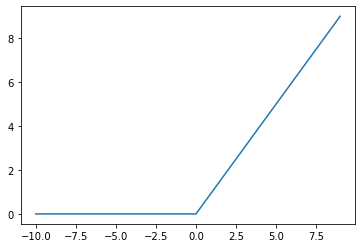

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
x = list(range(-10,10))
def ReLU(x):
    return max(0,x);
y = [ReLU(i) for i in x ]
plt.plot(x, y) 

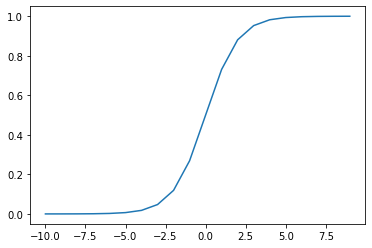

In [2]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))
y = [sigmoid(i) for i in x] 
plt.plot(x,y)

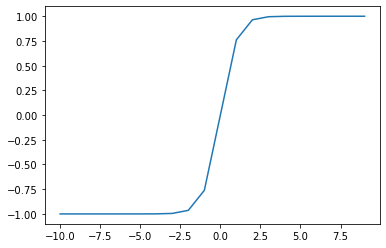

In [3]:
def tanh(x):
    return (np.exp(x)- np.exp(-x)) / (np.exp(x) + np.exp(-x))
y = [tanh(i) for i in x]
plt.plot(x,y) #I thought this would be hyperbolic, like a second degree polynomial. 

# 6. 

Suppose you have an MLP composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function.


- What is the shape of the input matrix X?

- What are the shapes of the hidden layer’s weight vector $W_h$ and its bias vector $b_h$?

- What are the shapes of the output layer’s weight vector $W_o$ and its bias vector $b_o$?

- What is the shape of the network’s output matrix Y?

- Write the equation that computes the network’s output matrix Y as a function of X, $W_h$, $b_h$, $W_o$, and $b_o$.

## My solution 

The shape of the input matrix sohuld be a 10 by 10? 

The A weight vector have one row per input neuron and one column for each artifical neuron in the hidden layer. Therefor it should be (10,50). There should be one bias neuron per artifical neuron in the layer.Thus the bias vector should be of size (50).

The shaped of the output weight vector should be (50,3). The bias vector should be of shape, (3).

The shape of the networks output matrix y should be (3,3)

$$h_{(W,b)}(X)=ϕ(XW+b) $$

## Book Solution 

Considering the MLP described in the question, composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons, where all artificial neurons use the ReLU activation function:

The shape of the input matrix X is m × 10, where m represents the training batch size.

The shape of the hidden layer’s weight vector Wh is 10 × 50, and the length of its bias vector bh is 50.

The shape of the output layer’s weight vector Wo is 50 × 3, and the length of its bias vector bo is 3.

The shape of the network’s output matrix Y is m × 3.

$Y* = ReLU(ReLU(X W_h + b_h) W_o + b_o)$. Recall that the ReLU function just sets every negative number in the matrix to zero. Also note that when you are adding a bias vector to a matrix, it is added to every single row in the matrix, which is called broadcasting.

# 7. 

How many neurons do you need in the output layer if you want to classify email into spam or ham? What activation function should you use in the output layer? If instead you want to tackle MNIST, how many neurons do you need in the output layer, and which activation function should you use? What about for getting your network to predict housing prices, as in Chapter 2?

# My solution 

For Ham or Spam we should create a model with a single neurons in the output layer. The activation function can be Sigmoid activiation function.

In the Fashion MNIST dataset we need a n output layer with 10 neurons, one for each class.  The activation function is the softmax function ensures the neurons add up to one. 

To predict housing prices we have a regression problem. Thus we need a sigle output neuron. More so the activation function can be RELU. 

## Book Solution 

If you want your neural network to predict housing prices like in Chapter 2, then you need one output neuron, using no activation function at all in the output layer.3

# 8. 

What is backpropagation and how does it work? What is the difference between backpropagation and reverse-mode autodiff?


## My solution 

Backpropagation is similar to a gradient discent algorithm. It trains the model and at the end measures error. It measures the error at each layer, finding the gradient and performing gradient discent on the weights. This should reduce error for each epoch. 

Reverse mode autodiff is the process utilized in backpropagation. 

# 9. 

Can you list all the hyperparameters you can tweak in a basic MLP? If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?

## My solution

The hyperparameters are: Neurons, layers, activation functions, learning rate, regularization, and batch size.

If an MLP was overfiting we can reduce the number of laters, remove/reduce regularization and reduve the batch size from a large number to 32. 

## Book Solution 

Here is a list of all the hyperparameters you can tweak in a basic MLP: the number of hidden layers, the number of neurons in each hidden layer, and the activation function used in each hidden layer and in the output layer.4 In general, the ReLU activation function (or one of its variants; see Chapter 11) is a good default for the hidden layers. For the output layer, in general you will want the logistic activation function for binary classification, the softmax activation function for multiclass classification, or no activation function for regression.

If the MLP overfits the training data, you can try reducing the number of hidden layers and reducing the number of neurons per hidden layer.

# 10. 

Train a deep MLP on the MNIST dataset (you can load it using keras.datasets.mnist.load_data(). See if you can get over 98% precision. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Try adding all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.

In [4]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np

In [5]:
# A good classifcation set would be the MNIST Fashion dataset covered ealier in the chatper 
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
#The algorithm will be trained with gradient discent
#Thus regularization will be needed 
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [7]:
# For Fashion MNIST we need the list of class names to know what we are dealing with:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [8]:
#Create a lib for the logs 
import os
root_logdir = os.path.join(os.curdir, "exercise10_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

### Exp method 

In [9]:
# I had not idea how to use the exp method so I took it from the solutions
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

C:\Users\JungleBook\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [11]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 7s 4ms/step - loss: 1.5519 - accuracy: 0.5125 - val_loss: 2.3313 - val_accuracy: 0.1024


Text(0, 0.5, 'Loss')

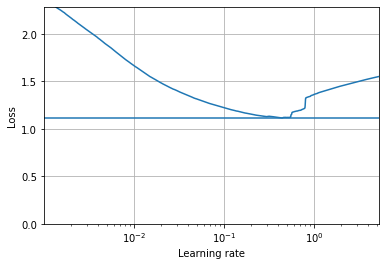

In [12]:
import matplotlib.pyplot as plt
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The point where loss shots up violently is about .5. Lets try using half that. 

In [13]:
#The description of this probem, makes me assume we are using a function to do this 
def build_model(n_hidden=2, n_neurons=30, learning_rate=25e-2, input_shape=[28,28]):
    model = keras.models.Sequential() # Structure of model
    model.add(keras.layers.Flatten(input_shape=input_shape)) #Input layer
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu")) ##hidden layers
    model.add(keras.layers.Dense(10, activation="softmax"))#output later
    optimizer = keras.optimizers.SGD(lr=learning_rate) # activation function 
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics = ["accuracy"])
    return model

#Wrap the function as a keras model 
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

#Declare where the callback logs will go
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)

#Code below is for a single run. 
"""
history = keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid), 
              callbacks=[keras.callbacks.EarlyStopping(patience=10),tensorboard_cb ])
"""
#We need a way of trying a lot of different things

'\nhistory = keras_reg.fit(X_train, y_train, epochs=100,\n              validation_data=(X_valid, y_valid), \n              callbacks=[keras.callbacks.EarlyStopping(patience=10),tensorboard_cb ])\n'

In [15]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": [20 , 300],
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10), tensorboard_cb, checkpoint_cb])

C:\Users\JungleBook\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\JungleBook\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
1146/1146 [==============================] - 3s 2ms/step - loss: 0.8673 - accuracy: 0.7696 - val_loss: 0.8408 - val_accuracy: 0.7604
Epoch 2/100
1146/1146 [==============================] - 3s 3ms/step - loss: 0.6929 - accuracy: 0.8131 - val_loss: 0.9396 - val_accuracy: 0.7890
Epoch 3/100
1146/1146 [==============================] - 2s 1ms/step - loss: 0.6669 - accuracy: 0.8186 - val_loss: 0.8047 - val_accuracy: 0.8066
Epoch 4/100
1146/1146 [==============================] - 2s 1ms/step - loss: 0.6194 - accuracy: 0.8292 - val_loss: 0.5157 - val_accuracy: 0.8472
Epoch 5/100
1146/1146 [==============================] - 2s 2ms/step - loss: 0.6052 - accuracy: 0.8274 - val_loss: 0.7076 - val_accuracy: 0.8192
Epoch 6/100
1146/1146 [==============================] - 2s 2ms/step - loss: 0.5898 - accuracy: 0.8325 - val_loss: 0.6704 - val_accuracy: 0.7966
Epoch 7/100
1146/1146 [==============================] - 2s 2ms/step - loss: 0.6047 - accuracy: 0.8316 - val_loss: 0.5287 - val_ac

C:\Users\JungleBook\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
1146/1146 [==============================] - 2s 2ms/step - loss: 0.9371 - accuracy: 0.7626 - val_loss: 0.7040 - val_accuracy: 0.8026
Epoch 2/100
1146/1146 [==============================] - 2s 2ms/step - loss: 0.7118 - accuracy: 0.8079 - val_loss: 0.4999 - val_accuracy: 0.8394
Epoch 3/100
1146/1146 [==============================] - 3s 2ms/step - loss: 0.6720 - accuracy: 0.8142 - val_loss: 0.6209 - val_accuracy: 0.8346
Epoch 4/100
1146/1146 [==============================] - 2s 2ms/step - loss: 0.6588 - accuracy: 0.8205 - val_loss: 0.5662 - val_accuracy: 0.8274
Epoch 5/100
1146/1146 [==============================] - 2s 2ms/step - loss: 0.6268 - accuracy: 0.8258 - val_loss: 0.6027 - val_accuracy: 0.8336
Epoch 6/100
 562/1146 [=============>................] - ETA: 0s - loss: 0.6106 - accuracy: 0.8266

KeyboardInterrupt: 

The book solution for this can be found [here](https://github.com/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb). The one thing I didn't know how to do was use the exponential learning rate. They do it in the solution and it is a great way to quickly find the learning rate! They didn't do any hyperparameter tunning and I assumed it would be needed. 

Using the exponential learning rate is a greate way to reduce time spent in hyperparameter tunning. 

In [14]:
%load_ext tensorboard
%tensorboard --logdir=./exercise10_logs --port=6006

Reusing TensorBoard on port 6006 (pid 5172), started 0:48:49 ago. (Use '!kill 5172' to kill it.)